In [1]:
from __future__ import print_function

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/abhishek/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_excel('Concrete_Data.xls')
df = df/df.mean()
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.371692,1.167583,1.181027,0.117619,0.962983,0.079918,0.103642,1.383420,0.466407
min,0.362775,0.000000,0.000000,0.670554,0.000000,0.823296,0.767860,0.021900,0.065102
25%,0.684205,0.000000,0.000000,0.908208,0.000000,0.957942,0.944894,0.153300,0.661880
50%,0.970602,0.297718,0.000000,1.018911,1.023680,0.994944,1.007667,0.613200,0.961610
75%,1.244818,1.934489,2.182621,1.057465,1.637888,1.058054,1.065179,1.226399,1.288081
max,1.920576,4.863626,3.692758,1.360384,5.190943,1.176871,1.283127,7.993494,2.306092


In [3]:
data = df.values

In [4]:
train = data[:900]
test = data[900:]
x_train = train[:,:-1]
y_train = train[:,-1].reshape(900,1)
x_test = test[:,:-1]
y_test = test[:, -1].reshape(130,1)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(900, 8)
(900, 1)
(130, 8)
(130, 1)


In [5]:
lr = 1e-1
num_steps = 1000
display_step = 100
num_samples = x_train.shape[0]
num_attrib = x_train.shape[1]

In [6]:
weights = tf.Variable(tf.ones([8,1], dtype=tf.float32, name=None))
bias = tf.Variable(tf.constant(1.0))

In [7]:
X = tf.placeholder("float", [None, num_attrib])
Y = tf.placeholder("float", [None, 1])

In [8]:
preds = tf.add(tf.matmul(X, weights), bias)
loss = tf.reduce_sum(tf.pow(preds-Y, 2)/num_samples)
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
sess = tf.Session()
sess.run(init)

In [11]:
ep, ls = [], []
for step in range(1, num_steps+1):
    sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
    if step==1 or step%display_step == 0:
        cost = (sess.run(loss, feed_dict={X: x_train, Y: y_train}))
        print ('Step : %04d' %(step), ' Loss: {}'.format(cost))
        ep.append(step)
        ls.append(cost)

print ("\n Final Weights:")
print (sess.run(weights))
print ("\n Bias:")
print (sess.run(bias))

Step : 0001  Loss: 46.9250335693
Step : 0100  Loss: 0.0986919775605
Step : 0200  Loss: 0.0946119129658
Step : 0300  Loss: 0.0930579602718
Step : 0400  Loss: 0.0920426174998
Step : 0500  Loss: 0.0913100466132
Step : 0600  Loss: 0.0907748937607
Step : 0700  Loss: 0.0903833881021
Step : 0800  Loss: 0.0900969207287
Step : 0900  Loss: 0.0898873209953
Step : 1000  Loss: 0.0897339433432

 Final Weights:
[[ 0.8318259 ]
 [ 0.18206088]
 [ 0.12178484]
 [-0.7187403 ]
 [ 0.07505155]
 [ 0.24639677]
 [ 0.11520278]
 [ 0.14309587]]

 Bias:
0.0069163125


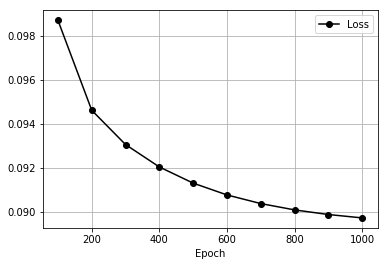

In [12]:
plt.plot(ep[1:], ls[1:], 'ko-', label='Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [13]:
print (sess.run(weights), sess.run(bias))

[[ 0.8318259 ]
 [ 0.18206088]
 [ 0.12178484]
 [-0.7187403 ]
 [ 0.07505155]
 [ 0.24639677]
 [ 0.11520278]
 [ 0.14309587]] 0.0069163125


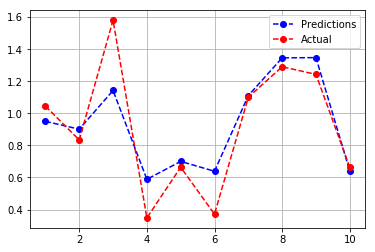


 Loss:  [1.33809191]


In [14]:
preds = sess.run(tf.add(tf.matmul(tf.cast(x_test, tf.float32), weights), bias))
plt.plot(range(1,11), preds[:10], 'bo--', label="Predictions")
plt.plot(range(1,11), y_test[:10], 'ro--', label="Actual")
plt.grid()
plt.legend()
plt.show()
print ("\n Loss: ",sum(abs(preds[:10]-y_test[:10])))

In [15]:
sess.close()